This project analyzes a time series on frozen dessert production and creates a forecasts using an ARIMA and an LSTM RNN model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
sns.set_style('whitegrid')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the data
df=pd.read_csv('/content/drive/MyDrive/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/DATA/Frozen_Dessert_Production.csv',index_col='DATE',parse_dates=True)

In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [5]:
df.columns = ['Production']

In [6]:
df.tail()

,Production
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


In [7]:
# 573 rows
 
df.shape

(573, 1)

# EDA

In [8]:
# Interactive Time Series plot of Production
 
fig = px.line(df, y='Production', x=df.index, title='Production Time Series')
fig.update_layout(xaxis_title='Date')
fig.show()

In [9]:
from numpy import polyfit
def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)
def get_season(s, yearly_periods=12, degree=3):
    X = [i%(yearly_periods) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)
def get_trend(s, degree=3):
    X = list(range(len(s)))
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

Text(0, 0.5, 'Production')

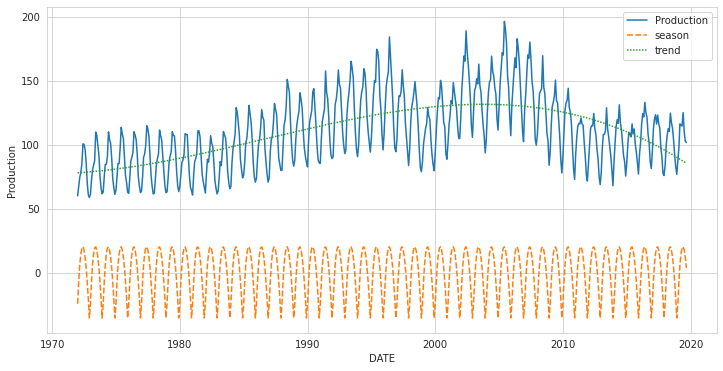

In [10]:
data = df.copy()
plt.figure(figsize=(12, 6))
data['trend'] = get_trend(data['Production'])
data['season'] = get_season(data['Production'] - data['trend'])
sns.lineplot(data=data[['Production', 'season', 'trend']])
plt.ylabel('Production')

In [11]:
# A test for stationarity is the augmented Dickey–Fuller test
# The second return value is the p-value
# With p-values below 5% or 0.05 we would typically reject the null hypothesis, 
# and we could assume that our time-series is stationary
from statsmodels.tsa import stattools
print('Production stationarity test:', stattools.adfuller(data['Production'])[1])
print('trend stationarity test:', stattools.adfuller(data['trend'])[1])
print('season stationarity test:', stattools.adfuller(data['season'])[1])

Production stationarity test: 0.3899778705938125
trend stationarity test: 0.9830000647300499
season stationarity test: 0.0


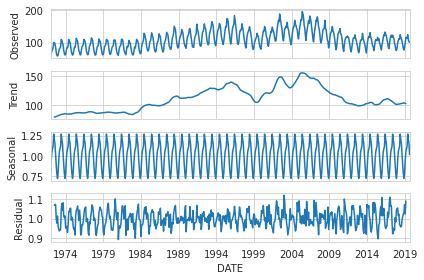

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
DecompDataAdd = seasonal_decompose(data['Production'], model='multiplicative', freq=12)
DecompDataAdd.plot();

# ARIMA Forecast model

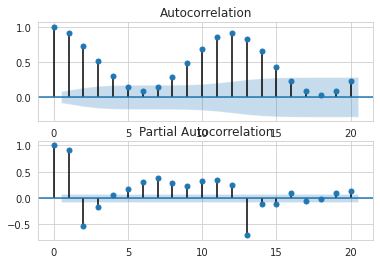

In [14]:
# correlation of each lag
import statsmodels.api as sm
fig, axes = plt.subplots(nrows=2, ncols=1)
sm.graphics.tsa.plot_acf(data['Production'], lags=20, ax=axes[0]);
sm.graphics.tsa.plot_pacf(data['Production'], lags=20, ax=axes[1]);

In [15]:
model = sm.tsa.ARIMA(df, order=(4,1,3))
fitted = model.fit(trend="c")
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                             ARIMA Model Results                              
Dep. Variable:           D.Production   No. Observations:                  572
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -1911.710
Method:                       css-mle   S.D. of innovations              6.782
Date:                Tue, 25 Jan 2022   AIC                           3841.420
Time:                        23:46:39   BIC                           3880.562
Sample:                    02-01-1972   HQIC                          3856.690
                         - 09-01-2019                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0450      0.172      0.261      0.794      -0.293       0.383
ar.L1.D.Production     0.5875        nan        nan        nan         nan         nan
ar.L2.D.Production  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning:

invalid value encountered in sqrt



In [16]:
forecast, std_err, fc_ci = fitted.forecast(steps=12)
forecast_index = pd.date_range(start='2019-10-01',periods=12,freq='MS')
forecast_df = pd.DataFrame(data=forecast,index=forecast_index, columns=['Forecast'])

In [17]:
Forecast = pd.concat([data, forecast_df])

In [18]:
Forecast

,Production,trend,season,Forecast
1972-01-01,59.9622,77.911935,-24.384817,NaN
1972-02-01,67.0605,77.967129,-6.922234,NaN
1972-03-01,74.2350,78.023956,5.965079,NaN
1972-04-01,78.1120,78.082406,14.570720,NaN
1972-05-01,84.7636,78.142470,19.188286,NaN
...,...,...,...,...
2020-05-01,NaN,NaN,NaN,123.156936
2020-06-01,NaN,NaN,NaN,125.589666
2020-07-01,NaN,NaN,NaN,119.215345
2020-08-01,NaN,NaN,NaN,112.650476


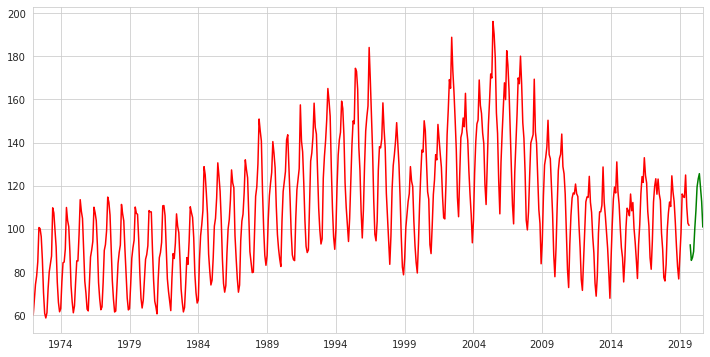

In [19]:
plt.figure(figsize=(12, 6))
Forecast['Production'].plot(c="r", label="Production")
Forecast['Forecast'].plot(c="g", label="Forecast")

### EDA with Dash

In [ ]:
!pip install jupyter-dash
!pip install pyngrok

In [ ]:
import plotly.graph_objs as go
fig2 = go.Figure([
    go.Scatter(
        name='Production',
        x=data.index,
        y=data['Production'],
        mode='lines',
        marker=dict(color='blue', size=2),
        showlegend=True
    ),
    go.Scatter(
        name='Trend',
        x=data.index,
        y=data['trend'],
        mode='lines',
        marker=dict(color='green', size=1),
        showlegend=True
    ),
    go.Scatter(
        name='Season',
        x=data.index,
        y=data['season'],
        marker=dict(color="orange"),
        line=dict(width=1),
        mode='lines',
        showlegend=True
    )
])
fig2.update_layout(
    yaxis_title='Production',
    title='Production Time Series',
    hovermode="x"
)


fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=Forecast.index, y=Forecast['Production'],
                    mode='lines',
                    name='Production'))
fig3.add_trace(go.Scatter(x=Forecast.index, y=Forecast['Forecast'],
                    mode='lines',
                    name='Forecast'))

fig2.show()
fig3.show()

In [ ]:
# Dashboard with Dash
 
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from pyngrok import ngrok
 
app = JupyterDash(__name__)
 
app.layout = html.Div([
    dcc.Graph(figure=fig2)
])
 
app.run_server(mode='external')

Dash app running on:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



<IPython.core.display.Javascript object>

In [ ]:
! ngrok authtoken 1vXlcIP1hk2NmY9UBuuSHU5gLHX_72emhyJmaGcTmoF6TQfKk

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
public_url = ngrok.connect(addr = '8050')

In [ ]:
public_url

<NgrokTunnel: "http://2b8c-34-68-86-11.ngrok.io" -> "http://localhost:8050">

In [ ]:
ngrok.kill()

# RNN Model

## Train-test Split

In [ ]:
len(df)

573

In [ ]:
test_size = 24

In [ ]:
test_ind = len(df)- test_size # test index

In [ ]:
train = df.iloc[:test_ind] # training set
test = df.iloc[test_ind:] # testing set is last 24 values

## Scale Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time Series Generator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 24
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

## Create the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()
model.add(LSTM(115, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 115)               53820     
                                                                 
 dense (Dense)               (None, 1)                 116       
                                                                 
Total params: 53,936
Trainable params: 53,936
Non-trainable params: 0
_________________________________________________________________


In [ ]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=20, batch_size=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit_generator(generator,epochs=25,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/25
525/525 [==============================] - 16s 23ms/step - loss: 0.0266 - val_loss: 0.0058
Epoch 2/25
525/525 [==============================] - 12s 23ms/step - loss: 0.0094 - val_loss: 0.0057
Epoch 3/25
525/525 [==============================] - 11s 21ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 4/25
525/525 [==============================] - 7s 13ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 5/25
525/525 [==============================] - 7s 12ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 6/25
525/525 [==============================] - 7s 12ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 7/25
525/525 [==============================] - 6s 12ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 8/25
525/525 [==============================] - 7s 13ms/step - loss: 0.0032 - val_loss: 0.0060
Epoch 9/25
525/525 [==============================] - 7s 13ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 10/25
525/525 [==============================] - 7s 12ms/step - loss: 0.0029 - val

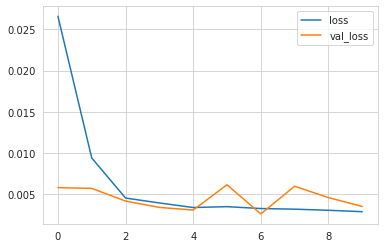

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [ ]:
test_predictions = []
 
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
 
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test

,Production,Predictions
DATE,,
2017-10-01,90.4732,88.242770
2017-11-01,77.4378,80.699008
2017-12-01,75.8118,81.635602
2018-01-01,83.4343,93.508707
2018-02-01,99.4899,108.187412
2018-03-01,107.3152,119.820846
2018-04-01,112.4309,129.068781
2018-05-01,110.3544,135.926453
2018-06-01,124.5841,138.804659


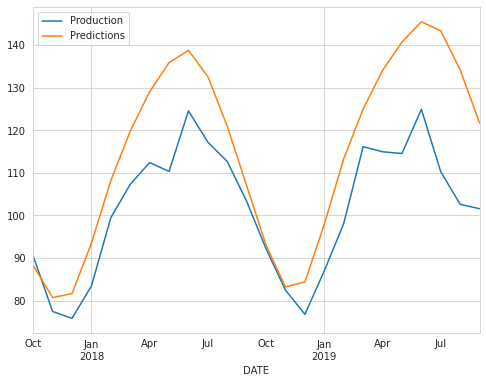

In [ ]:
test.plot(figsize=(8,6))

In [ ]:
from sklearn import metrics

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(test['Production'], test['Predictions'])))

RMSE: 16.19725121779297


# Forecast

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 24 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(115, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
 
 
# fit model
model.fit_generator(generator,epochs=8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/8
549/549 [==============================] - 8s 13ms/step - loss: 0.0251
Epoch 2/8
549/549 [==============================] - 7s 12ms/step - loss: 0.0185
Epoch 3/8
549/549 [==============================] - 8s 15ms/step - loss: 0.0069
Epoch 4/8
549/549 [==============================] - 10s 18ms/step - loss: 0.0050
Epoch 5/8
549/549 [==============================] - 7s 13ms/step - loss: 0.0038
Epoch 6/8
549/549 [==============================] - 7s 13ms/step - loss: 0.0033
Epoch 7/8
549/549 [==============================] - 7s 13ms/step - loss: 0.0031
Epoch 8/8
549/549 [==============================] - 7s 13ms/step - loss: 0.0033


In [ ]:
forecast = []
# Replace periods with forecast length
periods = 12
 
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
 
for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast_index = pd.date_range(start='2019-10-01',periods=periods,freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [ ]:
forecast_df

,Forecast
2019-10-01,86.666464
2019-11-01,82.845046
2019-12-01,86.951099
2020-01-01,97.552942
2020-02-01,110.271458
2020-03-01,121.020096
2020-04-01,128.593877
2020-05-01,130.783269
2020-06-01,126.001814
2020-07-01,114.750003


In [ ]:
Forecast = pd.concat([df, forecast_df])

In [ ]:
Forecast.head()

,Production,Forecast
1972-01-01,59.9622,NaN
1972-02-01,67.0605,NaN
1972-03-01,74.2350,NaN
1972-04-01,78.1120,NaN
1972-05-01,84.7636,NaN


In [ ]:
Forecast.tail()

,Production,Forecast
2020-05-01,NaN,130.783269
2020-06-01,NaN,126.001814
2020-07-01,NaN,114.750003
2020-08-01,NaN,99.589183
2020-09-01,NaN,85.650561


In [ ]:
# Plot of previous and forecasted data

import plotly.graph_objects as go

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=Forecast.index, y=Forecast['Production'],
                    mode='lines',
                    name='Production'))
fig2.add_trace(go.Scatter(x=Forecast.index, y=Forecast['Forecast'],
                    mode='lines',
                    name='Forecast'))

In [ ]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from pyngrok import ngrok
 
app = JupyterDash(__name__)
 
app.layout = html.Div([
    dcc.Graph(figure=fig2)
])
 
app.run_server(mode='external')

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
! ngrok authtoken 1vXlcIP1hk2NmY9UBuuSHU5gLHX_72emhyJmaGcTmoF6TQfKk

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
public_url = ngrok.connect(addr = '8050')

In [ ]:
public_url

<NgrokTunnel: "http://eb26-34-68-86-11.ngrok.io" -> "http://localhost:8050">

In [ ]:
ngrok.kill()

# Save model and scaler

In [ ]:
from google.colab import drive
 
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model
import joblib

In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Projects/ForecastingProduction_RNN/FC_model.h5')

In [ ]:
# Save the scaler
joblib.dump(scaled_full_data, '/content/drive/MyDrive/Projects/ForecastingProduction_RNN/FC_scaler.pkl')

['/content/drive/MyDrive/Projects/ForecastingProduction_RNN/FC_scaler.pkl']

# Load and run the model

In [ ]:
from google.colab import drive
 
drive.mount('drive')

import pandas as pd
import numpy as np

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/DATA/Frozen_Dessert_Production.csv',index_col='DATE',parse_dates=True)
df.columns = ['Production']

In [ ]:
from tensorflow.keras.models import load_model
import joblib

In [ ]:
FC_model = load_model('/content/drive/MyDrive/Projects/ForecastingProduction_RNN/FC_model.h5')

In [ ]:
FC_scaler = joblib.load("/content/drive/MyDrive/Projects/ForecastingProduction_RNN/FC_scaler.pkl")

In [ ]:
forecast = []
# Replace periods with forecast length
periods = 12
length = 24
n_features = 1
 
first_eval_batch = FC_scaler[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
 
for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = FC_model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
forecast = scaler.inverse_transform(forecast)

In [ ]:
forecast_index = pd.date_range(start='2019-10-01',periods=periods,freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [ ]:
forecast_df

,Forecast
2019-10-01,86.666464
2019-11-01,82.845046
2019-12-01,86.951099
2020-01-01,97.552942
2020-02-01,110.271458
2020-03-01,121.020096
2020-04-01,128.593877
2020-05-01,130.783269
2020-06-01,126.001814
2020-07-01,114.750003


In [ ]:
Forecast = pd.concat([df, forecast_df])
Forecast

,Production,Forecast
1972-01-01,59.9622,NaN
1972-02-01,67.0605,NaN
1972-03-01,74.2350,NaN
1972-04-01,78.1120,NaN
1972-05-01,84.7636,NaN
...,...,...
2020-05-01,NaN,130.783269
2020-06-01,NaN,126.001814
2020-07-01,NaN,114.750003
2020-08-01,NaN,99.589183


## Deploy the forecast with Dash and ngrok

In [ ]:
!pip install jupyter-dash
!pip install pyngrok

In [ ]:
# Plot of previous and forecasted data

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=Forecast.index, y=Forecast['Production'],
                    mode='lines',
                    name='Production'))
fig.add_trace(go.Scatter(x=Forecast.index, y=Forecast['Forecast'],
                    mode='lines',
                    name='Forecast'))

In [ ]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from pyngrok import ngrok
 
app = JupyterDash(__name__)
 
app.layout = html.Div([
    dcc.Graph(figure=fig)
])
 
app.run_server(mode='external')

Dash app running on:


<IPython.core.display.Javascript object>

In [ ]:
! ngrok authtoken 1vXlcIP1hk2NmY9UBuuSHU5gLHX_72emhyJmaGcTmoF6TQfKk

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
public_url = ngrok.connect(addr = '8050')

In [ ]:
public_url

<NgrokTunnel: "http://a5b3-34-68-86-11.ngrok.io" -> "http://localhost:8050">

In [ ]:
ngrok.kill()